# LEAD SCORING CASE STUDY

Main objectives of the Case Study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

## Required Libraries 

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Loading

In [4]:
#Importing the dataset to a csv file.
df = pd.read_csv("Leads.csv")

In [5]:
#Displaying the content of the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#Inspecting the shape
print(df.shape)

(9240, 37)


In [7]:
#Inspecting the columns
print(df.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [8]:
#inspecting the datatypes of variables
print(df.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [9]:
#arranging all the columns along with name,no of non null values,datatype,memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
#Describing Mean,std,min,25%,50%,75%,max of the dataset
print(df.describe()) 

         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     

## Data Cleaning 

### Replace all Select values in the dataframe with np.nan

###  Select variable does not provide any information regarding the data, It just means that the user has not answered anything for the particular question and it is better to treat them as missing values.

In [11]:
#Inspecting all the columns with Select variable in the dataframe.
colsHavingSelect = df.isin(["Select"]).any()
print(colsHavingSelect)

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [12]:
#df.replace() will replace all the occurances of the given string to missing values.
df.replace('Select', np.nan,inplace=True)

### Calculating the missing value percentage in each column

In [13]:
#Percentage of missing values in each column.
nullseries = round(df.isnull().sum() * 100 / len(df),2)
print(nullseries)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Observation : There are high missing value percentages in many columns and we must remove them.

## Data Cleaning - Removing (Score variable) all unnecessary information from the dataframe.

Score variable are those variables in the dataframe where the sales team has already contacted the lead, since the lead has already been contacted it does not add more value to our analysis, So we drop these variables.

**Dropping the below score variable first**

- Tags
- Lead Quality
- Lead Profile
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score 

In [15]:
#Dropping mentioned score variables in the dataframe.
df.drop(['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [16]:
# above score variables are removed from the list.
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
# Also remove the 'Last Notable Activity' column as this column is recorded once the Sales team is in contact with the lead.
df.drop('Last Notable Activity', axis = 1, inplace=True)

In [18]:
#Percentage of missing values in each column.
nullseries = round(df.isnull().sum() * 100 / len(df),2)
print(nullseries)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Treating all missing values in the dataframe (~40%)

## Drop columns that has missing value percentage of about 38-40% approximately

In [19]:
#columns having null value greater than or equal to 38%
print(nullseries[nullseries >= 38])

How did you hear about X Education    78.46
City                                  39.71
dtype: float64


In [20]:
#Drop all columns having a missing value percentage greater than 38%.
df = df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index))>=38))].columns, 1)

In [21]:
#Percentage of missing values in each column.
nullseries = round(df.isnull().sum() * 100 / len(df),2)
print(nullseries)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Checking for unique category - Combining categories  having low values to make a meaningful category

In [22]:
#Checking uniqueness in all categorical variables
df['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [23]:
#Checking uniqueness in all categorical variables
df['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [24]:
#Checking uniqueness in all categorical variables
df['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [25]:
#Checking uniqueness in all categorical variables
df['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [26]:
#Checking uniqueness in all categorical variables
df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [27]:
#Checking uniqueness in all categorical variables
df['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [28]:
#Checking uniqueness in all categorical variables
df['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [29]:
#Checking uniqueness in all categorical variables
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [30]:
#Checking uniqueness in all categorical variables
df['What matters most to you in choosing a course'].value_counts(normalize=True) 

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [31]:
#Checking uniqueness in all categorical variables
df['Search'].value_counts(normalize=True) 

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [32]:
#Checking uniqueness in all categorical variables
df['Magazine'].value_counts(normalize=True) 

No    1.0
Name: Magazine, dtype: float64

In [33]:
#Checking uniqueness in all categorical variables
df['Newspaper Article'].value_counts(normalize=True) 

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [34]:
#Checking uniqueness in all categorical variables
df['X Education Forums'].value_counts(normalize=True) 

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [35]:
#Checking uniqueness in all categorical variables
df['Digital Advertisement'].value_counts(normalize=True) 

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [36]:
#Checking uniqueness in all categorical variables
df['Through Recommendations'].value_counts(normalize=True) 

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [37]:
#Checking uniqueness in all categorical variables
df['Receive More Updates About Our Courses'].value_counts(normalize=True) 

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [38]:
#Checking uniqueness in all categorical variables
df['Get updates on DM Content'].value_counts(normalize=True) 

No    1.0
Name: Get updates on DM Content, dtype: float64

In [39]:
#Checking uniqueness in all categorical variable
df['Update me on Supply Chain Content'].value_counts(normalize=True) 

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [40]:
#Checking uniqueness in all categorical variable
df['I agree to pay the amount through cheque'].value_counts(normalize=True) 

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [41]:
#Checking uniqueness in all categorical variable
df['A free copy of Mastering The Interview'].value_counts(normalize=True) 

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

## Dropping highky skewed columns  : there is a high data imbalance amongst the columns and it does not add more value to model building

## we are dropping the Following Columns:

- Do Not Email
- Do Not Call
- Country 
- What matters most to you in choosing a course 
- Search
- Magazine
- Newspaper Article  
- X Education Forums
- Newspaper
- Digital Advertisement 
- Through Recommendations
- Receive More Updates About Our Courses 
- Update me on Supply Chain Content
- Get updates on DM Content 
- I agree to pay the amount through cheque

In [42]:
#Using drop to remove columns with high data imbalance 
df.drop(['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course', 
'Search','Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 
'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [43]:
#Inspecting to check if the columns have been deleted carefully.
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [44]:
#Percentage of missing values in each column.
nullseries = round(df.isnull().sum() * 100 / len(df),2)
print(nullseries)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
dtype: float64


In [45]:
print("Total number of columns :", len(df.columns))

Total number of columns : 12


### Combining columns having low percentages into one single column.

## Following columns in which categories are to be combined and form "Others" category :

- Lead Origin
- Lead Source
- Last Activity
- Specialization
- What is your current occupation 

**Lead Origin**

In [46]:
#Inspecting the column again
df['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [47]:
#Combining categories with very low row percentages as it does not make sense to create dummies for such rows.
df['Lead Origin'] = df['Lead Origin'].replace(['Lead Import','Quick Add Form'] ,'Others')

In [48]:
#Checking if the category has been correctly replaced. 
df['Lead Origin'].value_counts(normalize=True) 

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Others                     0.006061
Name: Lead Origin, dtype: float64

## Now, Performing the same for other columns

**Lead Source**

In [49]:
#Inspecting Lead Source column.
df['Lead Source'].value_counts(normalize=True) 

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [50]:
#Combining categories
df['Lead Source'] = df['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call', 
                                                   'Press_Release','Social Media','Live Chat','Pay per Click Ads','blog','WeLearn',
                                                   'youtubechannel','testone','NC_EDM' ,'welearnblog_Home'] ,'Others')

In [51]:
#Inspecting Lead Source column.
df['Lead Source'].value_counts(normalize=True) 

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
Name: Lead Source, dtype: float64

#### Last Activity

In [52]:
#Inspecting 'Last Activity' column
df['Last Activity'].value_counts(normalize=True) 

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [53]:
#Combining together to form 'Others' Categories. 
df['Last Activity']=df['Last Activity'].replace(['Form Submitted on Website'      ,
'Unreachable'                    ,
'Unsubscribed'                   ,
'Had a Phone Conversation'       ,
'Approached upfront'             ,
'View in browser link Clicked'   ,
'Email Received'                 ,
'Email Marked Spam'              ,
'Visited Booth in Tradeshow'     ,
'Resubscribed to emails'],'Others') 

In [54]:
#Inspecting 'Last Activity' column
df['Last Activity'].value_counts(normalize=True) 

Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Email Bounced              0.035679
Others                     0.035132
Email Link Clicked         0.029222
Name: Last Activity, dtype: float64

##  Specialization

In [55]:
#Inspecting the specialization column
df['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [56]:
#Combining categories < 2%  into 'Others'
df['Specialization']=df['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence','Hospitality Management','E-COMMERCE','Retail Management'],'Others')      

In [57]:
#Inspecting the column again to recheck the same.
df['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Others                               0.084642
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Name: Specialization, dtype: float64

In [58]:
#We also handle the missing values for this Specialisation column, we add another column known as "Not Specified" for all missing values.
df.Specialization.fillna('Not Specified', inplace=True)

In [59]:
#Inspecting the column again to recheck the same.
df['Specialization'].value_counts(normalize=True)

Not Specified                        0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Others                               0.053680
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Name: Specialization, dtype: float64

## Current Occupation

In [60]:
#Inspecting value counts for Current Occupation
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [61]:
#Combining categories 
df['What is your current occupation']=df['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

In [62]:
#Rechecking to find if the categories are correctly combined.
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

### Imputing columns with low null value percentages

## in general categorical columns are imputed with 'mode',Numerical columns are imputed with mean or median

In [63]:
#Percentage of missing values in each column.
nullseries = round(df.isnull().sum() * 100 / len(df),2)
print(nullseries)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
dtype: float64


#### **Imputing categorical columns**

In [64]:
#Imputing categorical columns with Mode
df['Lead Source'].value_counts(normalize=True) 

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
Name: Lead Source, dtype: float64

In [65]:
#Imputing missing values in 'Lead Source' with mode. 
df['Lead Source'].fillna('Google',inplace=True)

In [66]:
#Imputing categorical columns with Mode
df['Last Activity'].value_counts(normalize=True) 

Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Email Bounced              0.035679
Others                     0.035132
Email Link Clicked         0.029222
Name: Last Activity, dtype: float64

In [67]:
#Imputing missing values in 'Last Activity' with mode. 
df['Last Activity'].fillna('Email Opened',inplace=True)

In [68]:
#Imputing categorical columns with Mode
df['What is your current occupation'].value_counts(normalize=True) 

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

In [69]:
#Replacing categorical columns with Unemployed in Current Occupation 
df['What is your current occupation'].fillna('Unemployed', inplace = True)

#### Impute numerical columns

In [70]:
#Since TotalVisits is a numerical column, we first inspect the data.
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

## Observation : We can see that both mean and median = 3 and we can impute it with either mean or median , but we choose to impute it with median.

In [71]:
#Imputing missing values in 'TotalVisits' with mean/median which is 3. 
df['TotalVisits'].fillna(df['TotalVisits'].median(),inplace=True)

In [72]:
#Checking for distribution
df['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [73]:
#Page Per Views is also a numerical column, hence we check the distribution first.
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

## Observation : We can see that both mean and median ~ 2 and we can impute it with either mean or median, but we choose to impute it with median.

In [74]:
#Imputing missing values with mean/median which is 2. 
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)

In [75]:
#Page Per Views is also a numerical column, hence we check the distribution first.
df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

### Cross-Checking for missing values again.

In [76]:
#Percentage of missing values in each column.
nullseries = round(df.isnull().sum() * 100 / len(df),2)
print(nullseries)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64


## Observation : data is cleaned thoroughly there are no more missing values.

In [77]:
#Row-wise null count
print(df.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
       ..
9235    0
9236    0
9237    0
9238    0
9239    0
Length: 9240, dtype: int64


## Duplicates check

In [78]:
#Checking for any duplicates in the data.
df.loc[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview


## Observation : There are no duplicate rows in the dataset.

## EDA (Exploratory Data Analysis)

In [79]:
#Displaying the data types on different columns
df.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

**EDA - Numerical Values**

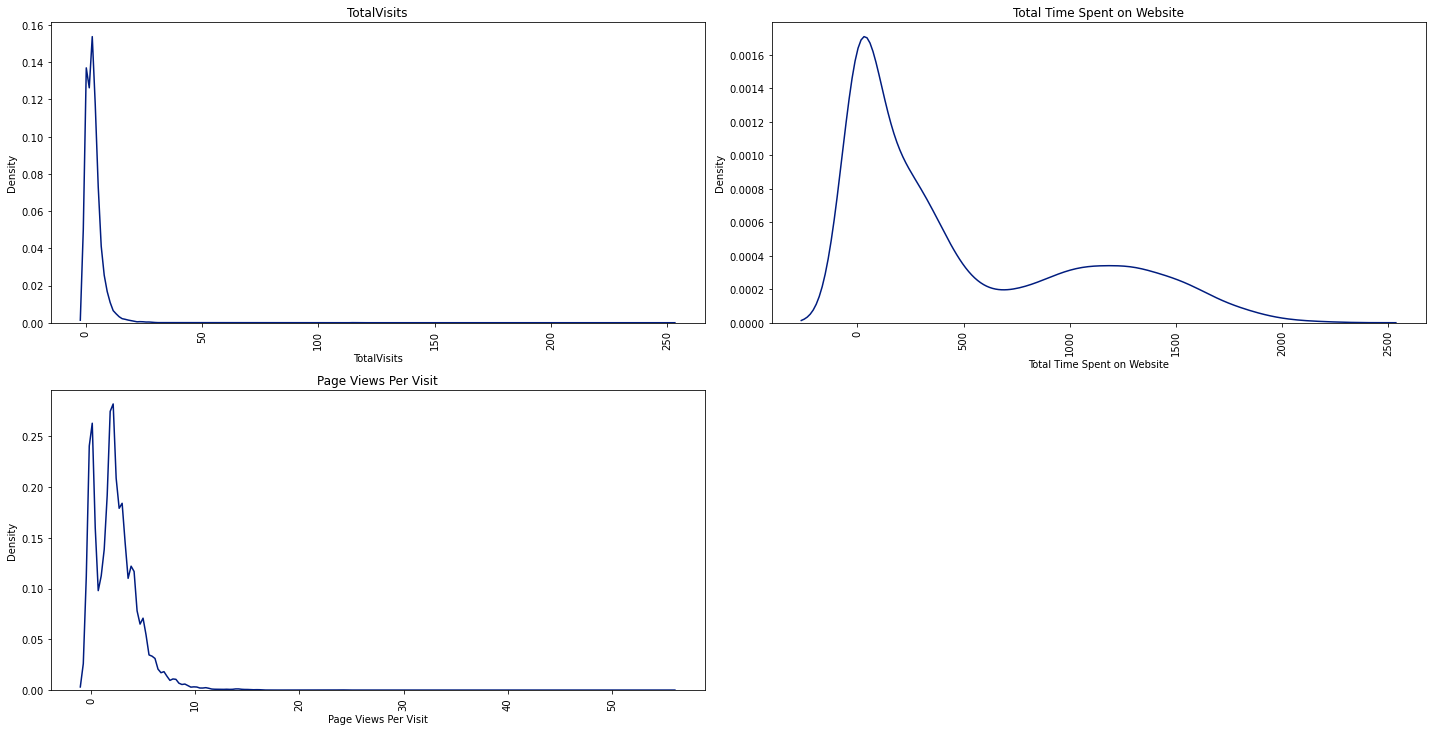

In [80]:
Required_columns= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.set_palette("dark")
plt.figure(figsize = (20, 20))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(df[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90)

## Observation 

## Uni-variate Analysis - Numerical values

- The max probability for TotalVisits is found to be around 15-20. It increases initially but decreases further.
- The max probability for PageViewsPerVisit is found to be around to be 3-5
- The probability of time spent is found to be high for time between 0-300 seconds and decreases further.

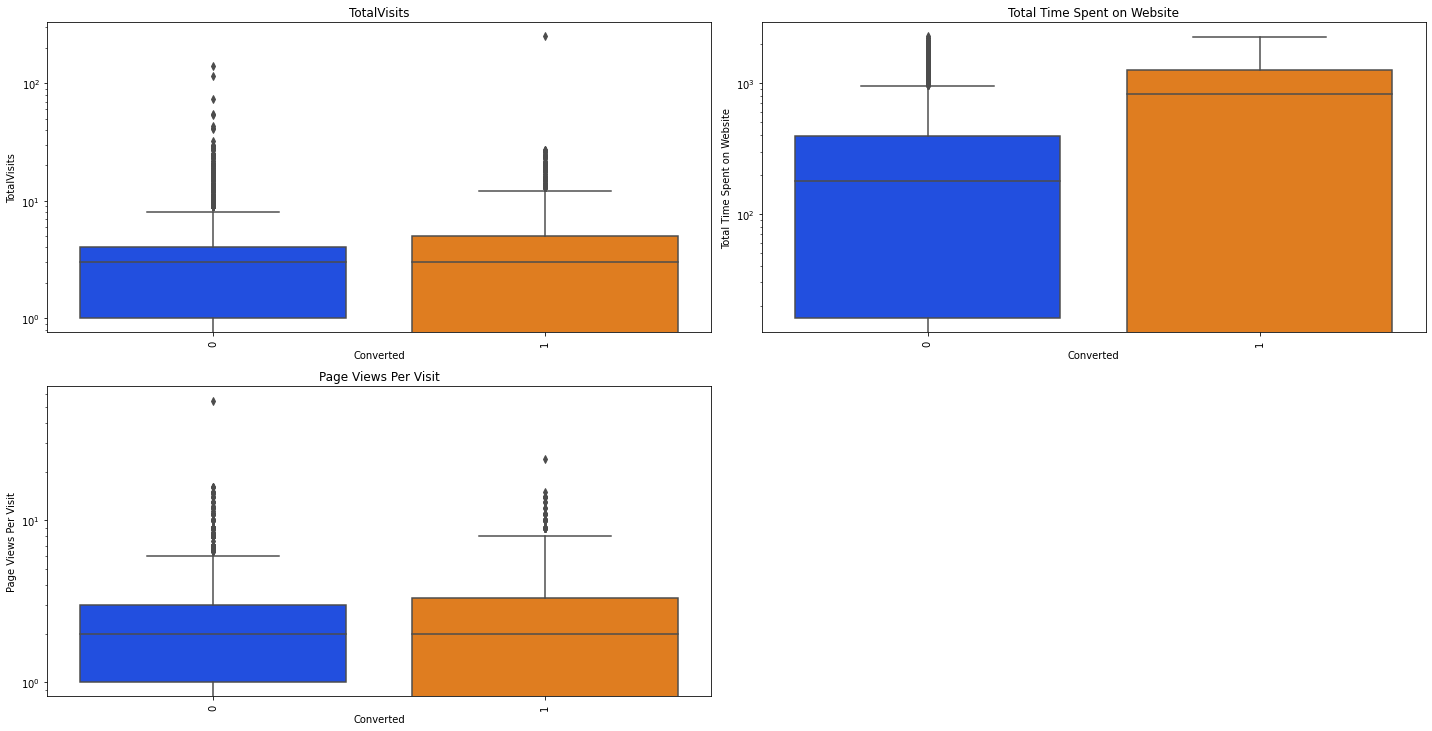

In [81]:
Required_columns= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.set_palette("bright")
plt.figure(figsize = (20, 20))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='Converted', y=col[1], data = df)
    ax.set_yscale('log')
    plt.tight_layout()
    plt.xticks(rotation = 90)

## Bi-variate Analysis - Numerical values

- The mean is found to be higher in case of Converted people rather than non-converted people. 

- The average page views for both converted and non converted is found to be the same. 

- The average total visits for both converted and non converted people is found to be the same.

**EDA - Categorical values**

In [82]:
#Copying from the lead dataframe for easier eda
dfCopy = df.copy()

In [83]:
#Displaying the dataframe
dfCopy.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No


In [84]:
dfCopy['Category'] = dfCopy.Converted.astype('category')

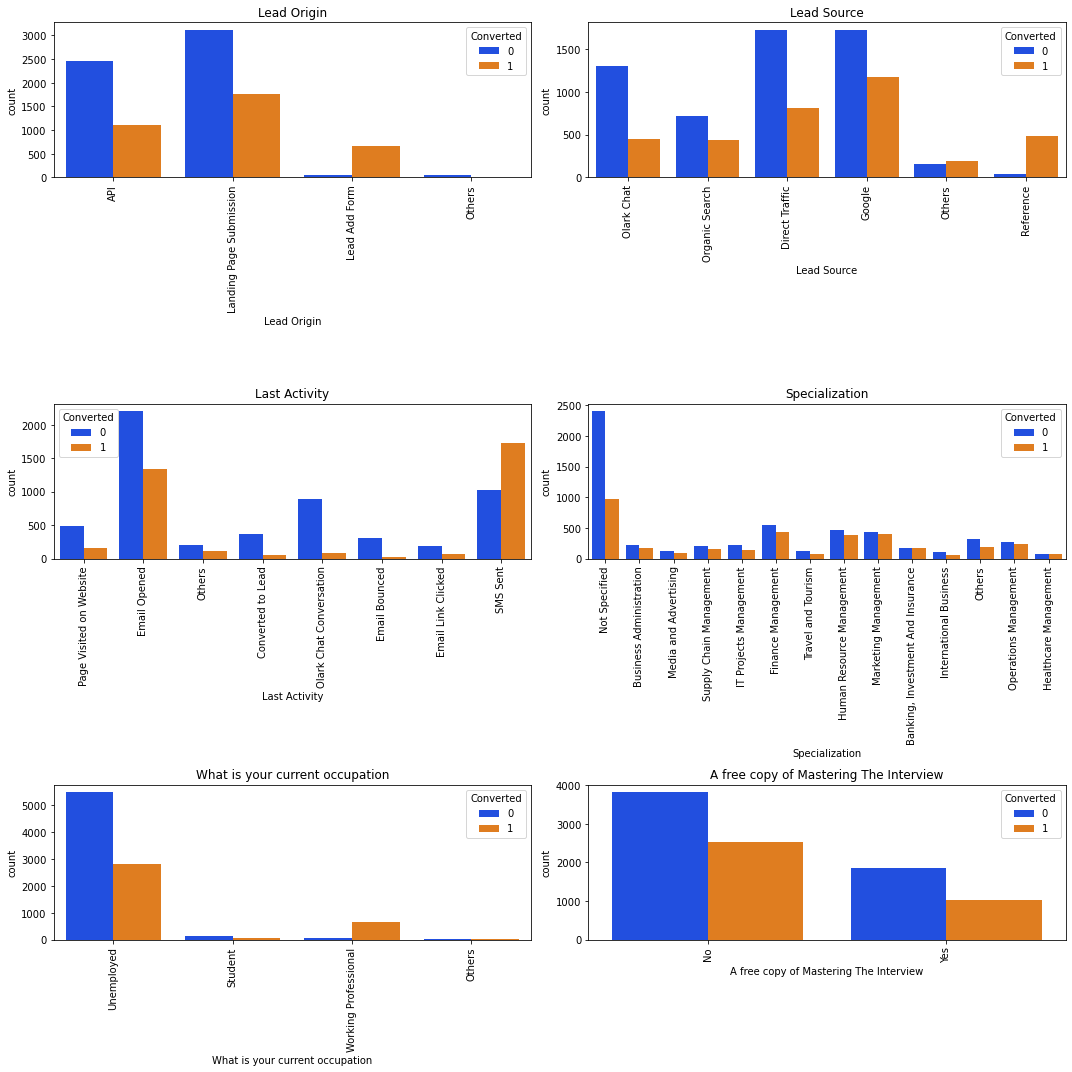

In [85]:
Required_columns= ['Lead Origin','Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview']
sns.set_palette("bright")

plt.figure(figsize = (15, 15))

for col in enumerate(Required_columns):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = dfCopy, x=col[1], hue='Converted') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

Univariate analysis for Categorical data

- The percentage of Converted people is found to be greater for Landing Page Submission. We can also see that if Lead source is Add Form, the ratio of lead conversion is very high(almost not converted is very less).

- Google is found to be the important source for Lead Conversion 

- We need to target people via Emails and SMS as it is found that the probability of response in case Converted leads is found to be higher. 

- We cannot infer much about conversion rate from specialisation as people who do not select any specialisation can also be converted to a lead.But the ratio of non converted leads is higher than converted ones if they didn't choose specialisation.

- It is clearly visible from the graph that we need to target the Unemployed and Working Professional to get a higher conversion rate. The ratio of conversion rate is higher than not converted people for working professionals. 

- People usually do not subscribe for a free copy of mastering the interview.

## Outliers Handling 

In [86]:
#Inspectig the data types of all columns
df.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

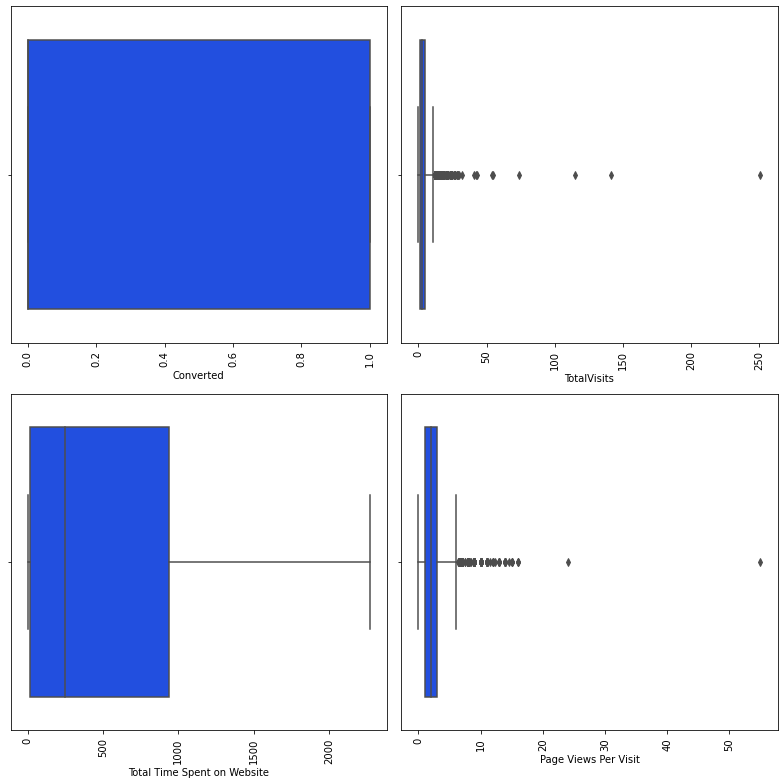

In [87]:
#There are 4 numerical columns - Converted , TotalVisits, Total Time Spent on Website, 'Page Views Per Visit
#Plotting them to check for outliers.

numerical_columns=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (11, 11))
sns.set_palette('bright')
for col in enumerate(numerical_columns):
    plt.subplot(2,2, col[0]+1)
    sns.boxplot(x = col[1], data = df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [88]:
#TotalVisits and Page Views Per Visit have outliers
df['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [89]:
#diff will provide the difference between outliers and 99th percentile. 
#If the value is too big, we can conclude that there are outliers.
diff = df.TotalVisits.max() - df.TotalVisits.quantile(0.99)
diff

234.0

In [90]:
df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [91]:
#diff2 will provide the difference between outliers and 99th percentile. 
#If the value is too big, we can conclude that there are outliers.
diff2 = df['Page Views Per Visit'].max() - df['Page Views Per Visit'].quantile(0.99)
diff2

46.0

## Capping Outliers
- We Perform Soft Capping.
- We check only for outliers in the upper range that are > 99th percentile.

In [92]:
req_cols=['TotalVisits','Page Views Per Visit'] 
for col in req_cols:
    percentiles = df[col].quantile(0.99)  ## capping higher range outliers
    df[col][df[col] >= percentiles] = percentiles

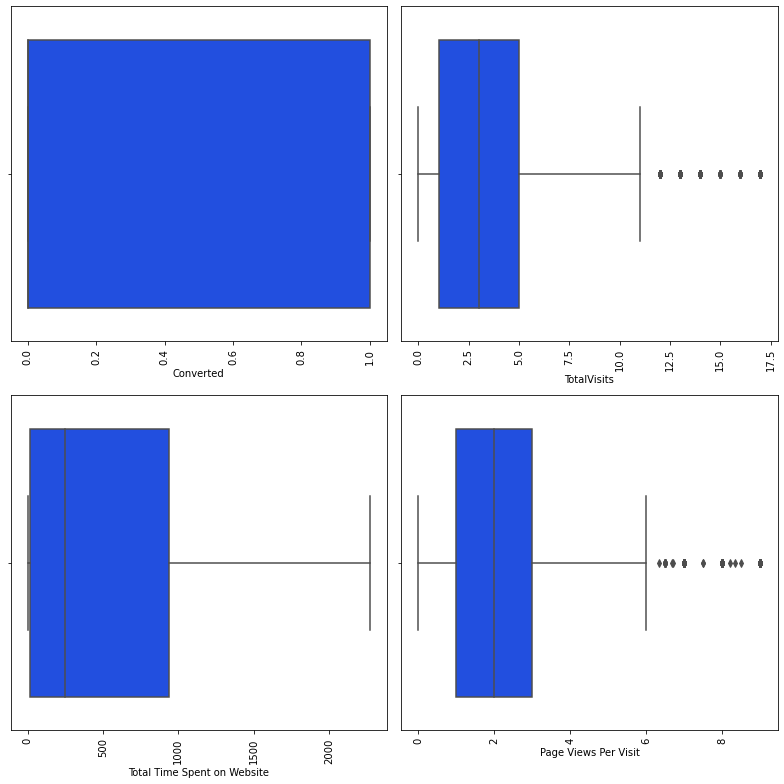

In [93]:
#Plotting the columns again to visualize after capping
numerical_columns=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (11, 11))
sns.set_palette('bright')
for col in enumerate(numerical_columns):
    plt.subplot(2,2, col[0]+1)
    sns.boxplot(x = col[1], data = df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

## CONCLUSION

-Conversion Rate for hot leads is increases from 73% to 96%. This means they have a 96% probability of getting converted to a lead.

-Focusing on Hot Leads will increase the chances of obtaining more value to the business as the number of people we contact are less but the conversion rate is high.

## From our model, we can conclude following points

- The customer/leads who fills the form are the potential leads.
- We must majorly focus on working professionals.
- We must majorly focus on leads whose last activity is SMS sent or Email opened.
- It’s always good to focus on customers, who have spent significant time on our website.
- It’s better to focus least on customers to whom the sent mail is bounced back.
- If the lead source is referral, he/she may not be the potential lead.
- If the lead didn’t fill specialization, he/she may not know what to study and are not right people to target. So, it’s better to focus less on such cases.



## RECOMMENDATIONS


-Focusing on Hot Leads will increase the chances of obtaining more value to the business as the number of people we contact are less but the conversion rate is high.

## Preparing the dataset for making model

In [94]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No


In [95]:
#Creating dummy variables for all non-binary categorical variables
# dummy1 = pd.get_dummies(df['Lead Origin'], prefix='Lead Origin')
# dummy2 = pd.get_dummies(df['Lead Source'], prefix='Lead Source')
# dummy3 = pd.get_dummies(df['Last Activity'], prefix='Last Activity')
# dummy4 = pd.get_dummies(df['Specialization'], prefix='Specialization')
# dummy5 = pd.get_dummies(df['What is your current occupation'], prefix='What is your current occupation')
# dummy6 = pd.get_dummies(df['A free copy of Mastering The Interview'], prefix='A free copy of Mastering The Interview')

In [96]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [97]:
#Reducing 1 variable
# dummy1 = pd.get_dummies(df['Lead Origin'], drop_first = True)
# dummy2 = pd.get_dummies(df['Lead Source'], drop_first = True)
# dummy3 = pd.get_dummies(df['Last Activity'], drop_first = True)
# dummy4 = pd.get_dummies(df['Specialization'], drop_first = True)
# dummy5 = pd.get_dummies(df['What is your current occupation'], drop_first = True)
# dummy6 = pd.get_dummies(df['A free copy of Mastering The Interview'], drop_first = True)

In [98]:
#Concatenating the dummy dataframe with the main dataframe
df = pd.concat([df, dummy], axis=1)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,...,0,1,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,...,0,1,0,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,1,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,...,1,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,...,0,1,0,0,0,0,0,1,0,0


In [99]:
#Dropping the non-binary categorical variables
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview'], axis=1)
df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,...,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0


## Train-Test Split

In [100]:
#Putting feature variable to 'X'
X = df.drop(['Prospect ID','Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [101]:
#Putting feature variable to 'y'
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [102]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [103]:
# Rescaling the features using MinMax Scaling
#1. Instantiate the object
scaler = MinMaxScaler()

#Creating the list of all numerical variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

#2. Fit on the data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
1871,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6795,0.235294,0.214349,0.147778,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3516,0.294118,0.046655,0.277778,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
8105,0.294118,0.541373,0.555556,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


## Feature Selection using RFE

In [104]:
#Feature Selection
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [105]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True,  True,  True])

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 5),
 ('Specialization_Finance Management', False, 14),
 ('Specialization_Healthcare Management', False, 15),
 ('Specialization_Human Resource Management', False, 9),
 ('Specialization_IT Projects Management', False,

In [107]:
col = X_train.columns[rfe.support_]

In [108]:
X_train = X_train[col]

In [109]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'A free copy of Mastering The Interview_Yes'],
      dtype='object')

### Creating Functions

In [110]:
#Function to create model using statsmodels api
def model_build(col):
    X_train_sm = sm.add_constant(X_train[col])
    logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())
    return logm2

In [111]:
def calculate_vif(col):
    df1 = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [112]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'A free copy of Mastering The Interview_Yes'],
      dtype='object')

## Model Building

### Model 1

In [113]:
#Building model 1
col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'A free copy of Mastering The Interview_Yes']

model_build(col)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2694.5
Date:                Tue, 24 Jan 2023   Deviance:                       5389.0
Time:                        15:26:28   Pearson chi2:                 7.96e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3911
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Observation: The p-value of column 'What is your current occupation_Student' > 0.05, then it should be dropped

In [114]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,22.04
3,Lead Origin_Landing Page Submission,7.81
2,Page Views Per Visit,6.15
15,Specialization_Not Specified,4.84
4,Lead Origin_Lead Add Form,4.83
7,Lead Source_Reference,4.44
10,Last Activity_Email Opened,4.36
0,TotalVisits,4.21
13,Last Activity_SMS Sent,3.74
6,Lead Source_Olark Chat,2.86


VIF value seems high for 'What is your current occupation_Unemployed','Lead Origin_Landing Page Submission','Page Views Per Visit'

In [115]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2694.5
Date:                Tue, 24 Jan 2023   Deviance:                       5389.0
Time:                        15:26:28   Pearson chi2:                 7.96e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3911
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1308      0.549     -2.060      0.039      -2.207      -0.055
TotalVisits                                              1.6560      0.242      6.843      0.000       1.182       2.130
Total Time Spent on Website                              4.4125      0.163     27.046      0.000       4.093       4.732
Page Views Per Visit                                    -1.2585      0.245     -5.127      0.000      -1.740      -0.777
Lead Origin_Landing Page Submission                     -0.9745      0.131     -7.412      0.000      -1.232      -0.717
Lead Origin_Lead Add Form                                4.1957      0.382     10.995      0.000       3.448       4.944
Lead Origin_Others                                      -0.5592      0.508     -1.101      0.271      -1.555       0.437
Lead Source_Olark Chat                                   0.9798      0.135      7.284      0.000       0.716       1.243
Lead Source_Reference                                   -1.2230      0.418     -2.928      0.003      -2.042      -0.404
Last Activity_Email Bounced                             -1.0319      0.318     -3.249      0.001      -1.654      -0.409
Last Activity_Email Link Clicked                         0.4772      0.246      1.944      0.052      -0.004       0.958
Last Activity_Email Opened                               0.9947      0.129      7.708      0.000       0.742       1.248
Last Activity_Olark Chat Conversation                   -0.5285      0.203     -2.604      0.009      -0.926      -0.131
Last Activity_Others                                     0.7946      0.218      3.641      0.000       0.367       1.222
Last Activity_SMS Sent                                   2.1196      0.133     15.982      0.000       1.860       2.380
Specialization_International Business                   -0.3330      0.249     -1.335      0.182      -0.822       0.156
Specialization_Not Specified                            -1.1867      0.125     -9.508      0.000      -1.431      -0.942
What is your current occupation_Student                 -0.5573      0.573     -0.973      0.330      -1.680       0.565
What is your current occupation_Unemployed              -0.9850      0.523     -1.885      0.059      -2.009       0.039
What is your current occupation_Working Professional     1.7277      0.553      3.124      0.002       0.644       2.812
A free copy of Mastering The Interview_Yes              -0.3397      0.087     -3.898      0.000      -0.510      -0.169
========================================================================================================================
"""

# 6. Creating Prediction

In [116]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.464724
6795    0.077811
3516    0.271966
8105    0.769599
3934    0.209486
4844    0.991583
3297    0.111282
8071    0.993562
987     0.146534
7423    0.873818
dtype: float64

In [117]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.46472421, 0.07781069, 0.27196582, 0.76959885, 0.20948644,
       0.99158278, 0.11128152, 0.99356175, 0.14653381, 0.87381803])

In [118]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.464724
1,0,0.077811
2,0,0.271966
3,0,0.769599
4,0,0.209486


In [119]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.464724,0
1,0,0.077811,0
2,0,0.271966,0
3,0,0.769599,1
4,0,0.209486,0


# 7. Model Evaluation

In [120]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [121]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3580,  422],
       [ 805, 1661]], dtype=int64)

In [122]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8102968460111317

___That's around 81% accuracy with is a very good value___

In [123]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [124]:
# Calculating the sensitivity
TP/(TP+FN)

0.6735604217356043

In [125]:
# Calculating the specificity
TN/(TN+FP)

0.894552723638181


___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 67% and specificity of around 89%.___

# 7. Optimise Cut off (ROC Curve)

In [126]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

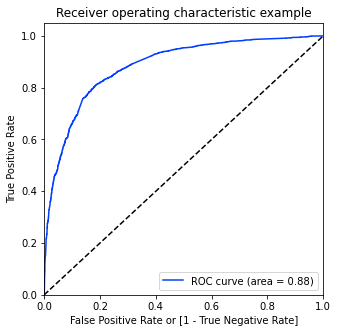

In [128]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

___The area under ROC curve is 0.88 which is a very good value.___

In [129]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.464724,0,1,1,1,1,1,0,0,0,0,0
1,0,0.077811,0,1,0,0,0,0,0,0,0,0,0
2,0,0.271966,0,1,1,1,0,0,0,0,0,0,0
3,0,0.769599,1,1,1,1,1,1,1,1,1,0,0
4,0,0.209486,0,1,1,1,0,0,0,0,0,0,0


In [130]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.607143,0.971208,0.382809
0.2,0.2,0.729437,0.928629,0.606697
0.3,0.3,0.798237,0.835766,0.775112
0.4,0.4,0.817254,0.778589,0.841079
0.5,0.5,0.810297,0.673560,0.894553
0.6,0.6,0.800402,0.601784,0.922789
0.7,0.7,0.782313,0.517843,0.945277
0.8,0.8,0.760204,0.420519,0.969515
0.9,0.9,0.710575,0.257502,0.989755


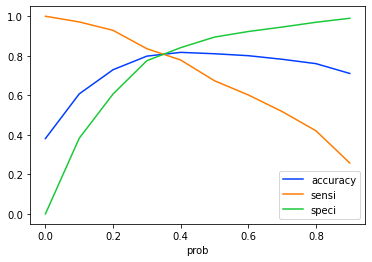

In [131]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### ___From the graph it is visible that the optimal cut off is at 0.35.___

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.464724,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.077811,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.271966,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.769599,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.209486,0,1,1,1,0,0,0,0,0,0,0,0


In [133]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8130797773654916

In [134]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3264,  738],
       [ 471, 1995]], dtype=int64)

In [135]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [136]:
# Calculating the sensitivity
TP/(TP+FN)

0.8090024330900243

In [137]:
# Calculating the specificity
TN/(TN+FP)

0.815592203898051

#### ___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 81%.___

# 8. Prediction on Test set

In [138]:
 # Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [139]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [140]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Bounced,...,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_International Business,Specialization_Not Specified,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
4269,1.0,0.027682,12.481481,1.549792e-06,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2376,1.0,0.000000,0.000000,0.000000e+00,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
7766,1.0,0.017301,0.728395,9.686198e-07,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9199,1.0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4359,1.0,0.000000,0.000000,0.000000e+00,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0.051903,3.580247,2.905859e-07,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2152,1.0,0.000000,0.000000,0.000000e+00,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
7101,1.0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
5331,1.0,0.010381,19.851852,5.811719e-07,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [141]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,1.000000
1,1,0.856907
2,1,0.990379
3,0,0.054618
4,1,0.864317


In [142]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,1.000000,1
1,1,0.856907,1
2,1,0.990379,1
3,0,0.054618,0
4,1,0.864317,1
...,...,...,...
2767,0,0.999997,1
2768,1,0.953148,1
2769,0,0.209486,0
2770,0,1.000000,1


In [143]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5266955266955267

In [144]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[ 417, 1260],
       [  52, 1043]], dtype=int64)

In [145]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [146]:
# Calculating the sensitivity
TP/(TP+FN)

0.9525114155251142

In [147]:
# Calculating the specificity
TN/(TN+FP)

0.24865831842576028

#### ___With the current cut off as 0.35 we have accuracy around 53%, sensitivity around 95% and specificity of around 25%.___



# 9. Precision-Recall

In [148]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3580,  422],
       [ 805, 1661]], dtype=int64)

In [149]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7974075852136342

In [150]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6735604217356043

#### ___With the current cut off as 0.35 we have Precision around 80% and Recall around 67%___

# 9.1. Precision and recall tradeoff

In [151]:
from sklearn.metrics import precision_recall_curve

In [152]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

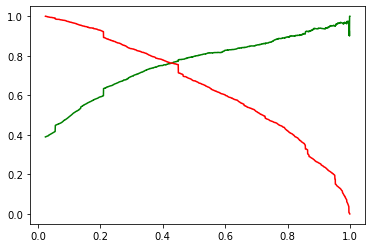

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [155]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.464724,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.077811,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.271966,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.769599,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.209486,0,1,1,1,0,0,0,0,0,0,0,0


In [156]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8174087816944959

In [157]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3384,  618],
       [ 563, 1903]], dtype=int64)

In [158]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [159]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7548591828639429

In [160]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7716950527169505

With the current cut off as 0.41 we have Precision around 75% and Recall around 77%

# 10. Prediction on Test set

In [161]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,1.000000
1,1,0.856907
2,1,0.990379
3,0,0.054618
4,1,0.864317


In [162]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,1.000000,1
1,1,0.856907,1
2,1,0.990379,1
3,0,0.054618,0
4,1,0.864317,1
...,...,...,...
2767,0,0.999997,1
2768,1,0.953148,1
2769,0,0.209486,0
2770,0,1.000000,1


In [163]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5277777777777778

In [164]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[ 426, 1251],
       [  58, 1037]], dtype=int64)

In [165]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [166]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.45323426573426573

In [167]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.9470319634703196

#### ___With the current cut off as 0.41 we have Precision around 45% and Recall around 95%___

# Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1.The total time spend on the Website.

2.Total number of visits.

3.When the lead source was:

  a. Google
  
  b. Direct traffic
  
  c. Organic search
  
  d. Olark Chat
  
4. When the last activity was:

  a. Page visited on website
  
  b. Email opened
  
  c. Converted to Lead
  
5. When the lead origin is Lead add format.

6. When their current occupation is as a working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.